In [2]:
import numpy as np
import matplotlib.pyplot as plt


x_data = []
y_data = []

file_path = 'zombies_data - Sheet1.csv'

with open(file_path, 'r') as f:
    lines = f.readlines()
    # Skip header row and parse
    for line in lines[1:]:
        parts = line.strip().split(',')
        if len(parts) >= 3:
            # Features: Sprint Speed (col 0), Ammo Clips (col 1)
            x_data.append([float(parts[0]), float(parts[1])])
            # Target: Result (col 2)
            y_data.append(float(parts[2]))

# Convert to Numpy Arrays for Matrix Operations
X = np.array(x_data)
y = np.array(y_data)

m, n_features = X.shape

print(f"Loaded {m} samples.")

Loaded 22 samples.


In [3]:
# Data Normalization
# Z-score standardization: x' = (x - mean) / std

mu = np.mean(X, axis=0)
sigma = np.std(X, axis=0)

# Avoid division by zero
sigma[sigma == 0] = 1

X_norm = (X - mu) / sigma

# Add Intercept Term (Bias) - Column of 1s
# X_b will be size (m, 3) -> [1, speed_norm, ammo_norm]
X_b = np.c_[np.ones((m, 1)), X_norm]

# --- 3. Logistic Regression Implementation ---

# Sigmoid Activation Function
# g(z) = 1 / (1 + e^-z)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost Function (Log Loss)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    
    # Add small epsilon to avoid log(0) error
    epsilon = 1e-10
    cost = (-1/m) * (np.dot(y, np.log(h + epsilon)) + np.dot((1 - y), np.log(1 - h + epsilon)))
    return cost

In [7]:
# Gradient Descent
theta = np.zeros(n_features + 1) 
alpha = 0.1
itr = 3000                    

cost_history = []

for i in range(itr):
    z = np.dot(X_b, theta)
    h = sigmoid(z)
    
    # Calculate Gradient
    gradient = (1/m) * np.dot(X_b.T, (h - y))
    
    # Update Weights
    theta -= alpha * gradient
    
    # Record Cost
    if i % 100 == 0:
        cost_history.append(compute_cost(X_b, y, theta))

print("Training complete.")
print(f"Final Weights: {theta}")

Training complete.
Final Weights: [1.44914079 6.78386509 4.90830166]


In [5]:
#Prediction

runner_features = np.array([25, 1])
runner_norm = (runner_features - mu) / sigma
runner_final = np.r_[1, runner_norm]

# Calculate Probability
probability = sigmoid(np.dot(runner_final, theta))
prediction = 1 if probability >= 0.5 else 0
label = "Survive" if prediction == 1 else "Infected"

print("-" * 30)
print(f"Test Prediction (25 km/h, 1 Ammo):")
print(f"Probability: {probability:.4f}")
print(f"Result: {prediction} ({label})")
print("-" * 30)

------------------------------
Test Prediction (25 km/h, 1 Ammo):
Probability: 0.9998
Result: 1 (Survive)
------------------------------


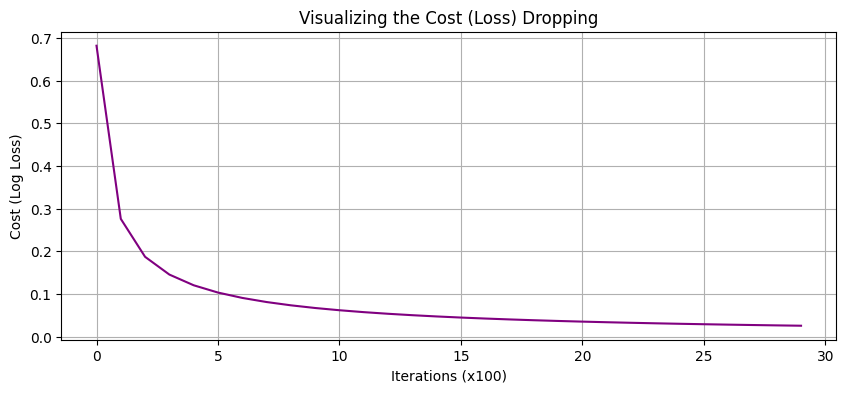

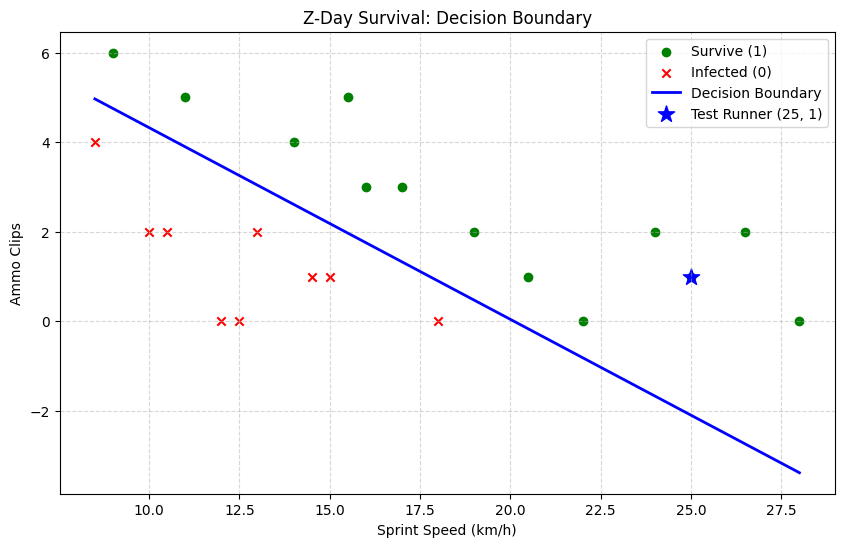

In [6]:
#Visualization 

Cost History
plt.figure(figsize=(10, 4))
plt.plot(range(len(cost_history)), cost_history, color='purple')
plt.title('Visualizing the Cost (Loss) Dropping')
plt.xlabel('Iterations (x100)')
plt.ylabel('Cost (Log Loss)')
plt.grid(True)
plt.show()

# Plot 2: Decision Boundary
plt.figure(figsize=(10, 6))

# Plot raw data points
survived = X[y == 1]
infected = X[y == 0]
plt.scatter(survived[:, 0], survived[:, 1], c='green', marker='o', label='Survive (1)')
plt.scatter(infected[:, 0], infected[:, 1], c='red', marker='x', label='Infected (0)')

# Plot Decision Boundary Line
# The boundary is where theta0 + theta1*x1_norm + theta2*x2_norm = 0
# Solve for x2 (Ammo) in terms of x1 (Speed) to plot the line:
# x2_norm = -(theta0 + theta1*x1_norm) / theta2
# Then un-normalize x2 to get back to original units.

# Generate x-values (Speed) for the line
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
# Normalize these x-values
x_vals_norm = (x_vals - mu[0]) / sigma[0]

# Calculate corresponding y-values (Ammo) in normalized space
theta0, theta1, theta2 = theta
y_vals_norm = -(theta0 + theta1 * x_vals_norm) / theta2

# Un-normalize y-values to plot in original space
y_vals = y_vals_norm * sigma[1] + mu[1]

plt.plot(x_vals, y_vals, label='Decision Boundary', color='blue', linewidth=2)

# Highlight the Test Point
plt.scatter([25], [1], c='blue', s=150, marker='*', label='Test Runner (25, 1)')

plt.xlabel('Sprint Speed (km/h)')
plt.ylabel('Ammo Clips')
plt.title('Z-Day Survival: Decision Boundary')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()